<a href="https://colab.research.google.com/github/mjiii25/posco-academy/blob/main/Big-Data/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
matplotlib.rc('font', family = 'Malgun Gothic')

### **데이터 구성하기**

In [34]:
df_raw = pd.read_csv('/content/mydrive/MyDrive/HMEQ.csv')

print(df_raw.shape)
df_raw.head()

(3748, 13)


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [35]:
df_raw.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [36]:
df_raw['JOB'].fillna('Other', inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [37]:
df_raw_dummy = pd.get_dummies(df_raw)

df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [38]:
df_raw_y = df_raw_dummy['BAD']
df_raw_x = df_raw_dummy.drop('BAD', axis = 1, inplace = False)

In [39]:
df_raw_y.head()

0    1
1    1
2    0
3    1
4    0
Name: BAD, dtype: int64

In [40]:
df_raw_x.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [45]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,
                                                                df_raw_y,
                                                                test_size = 0.3,
                                                                random_state = 1234)

print('분할 전 설명변수 데이터 : ', df_raw_x.shape)
print('분할 후 설명변수 데이터 : Train ', df_train_x.shape, ' Test ', df_test_x.shape)

분할 전 설명변수 데이터 :  (3748, 18)
분할 후 설명변수 데이터 : Train  (2623, 18)  Test  (1125, 18)


### **모델 생성**

In [46]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on training set : {:.3f}'.format(knn_uncustomized.score(df_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(knn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 0.916
Accuracy on test set : 0.908


#### **이웃 수 증가에 따른 정확도 변화**

In [47]:
train_accuracy = []; test_accuracy = []
para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors :
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors['Neighbors'] = para_n_neighbors
df_accuracy_neighbors['TrainScore'] = train_accuracy
df_accuracy_neighbors['TestScore'] = test_accuracy

In [48]:
df_accuracy_neighbors.round(3)

,Neighbors,TrainScore,TestScore
0,1,1.000,0.877
1,2,0.928,0.912
2,3,0.929,0.913
3,4,0.916,0.914
4,5,0.916,0.908
5,6,0.913,0.911
6,7,0.913,0.912
7,8,0.910,0.912
8,9,0.911,0.913
9,10,0.909,0.910


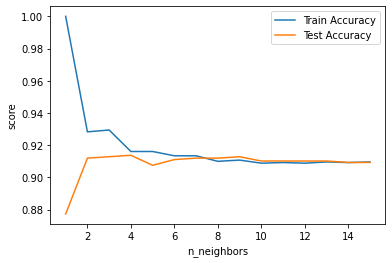

In [49]:
plt.plot(para_n_neighbors, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_n_neighbors, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('score'); plt.xlabel('n_neighbors')
plt.legend()

#### **가중치별 이웃 수 증가에 따른 정확도 변화**

In [50]:
train_accuracy = []; test_accuracy = []
para_n_neighbors = [i for i in range(3,31)] * 2
para_weights = (['uniform']) * 28 + (['distance'] * 28)

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights) :
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors,
                               weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_weights = pd.DataFrame()
df_accuracy_weights['Neighbors'] = para_n_neighbors
df_accuracy_weights['Weights'] = para_weights
df_accuracy_weights['TrainAccuracy'] = train_accuracy
df_accuracy_weights['TestAccuracy'] = test_accuracy

In [51]:
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = 'Neighbors',
                                                      columns = 'Weights',
                                                      values = ['TrainAccuracy', 'TestAccuracy'])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
3                   1.0  0.929470     0.912000  0.912889
4                   1.0  0.916127     0.913778  0.913778
5                   1.0  0.916127     0.912889  0.907556
6                   1.0  0.913458     0.912889  0.911111
7                   1.0  0.913458     0.912889  0.912000
8                   1.0  0.910027     0.913778  0.912000
9                   1.0  0.910789     0.914667  0.912889
10                  1.0  0.908883     0.914667  0.910222
11                  1.0  0.909264     0.914667  0.910222
12                  1.0  0.908883     0.913778  0.910222
13                  1.0  0.909645     0.912889  0.910222
14                  1.0  0.909264     0.912889  0.909333
15                  1.0  0.909645     0.911111  0.909333
16                  1.0  0.909264     0.912000  0.909333
17                  1.0  0.909645     0.912000  0.910222
18                  1.0  0.908502     0.912000  0.908444
19                  1.0  0.908502     0.911111  0.908444
20                  1.0  0.908502     0.911111  0.907556
21                  1.0  0.908502     0.911111  0.907556
22                  1.0  0.908502     0.911111  0.907556
23                  1.0  0.908502     0.910222  0.907556
24                  1.0  0.908502     0.910222  0.907556
25                  1.0  0.908502     0.910222  0.907556
26                  1.0  0.908120     0.911111  0.907556
27                  1.0  0.908120     0.911111  0.908444
28                  1.0  0.908120     0.910222  0.907556
29                  1.0  0.908120     0.909333  0.907556
30                  1.0  0.908120     0.909333  0.907556

In [52]:
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + '-' + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy-distance,TrainAccuracy-uniform,TestAccuracy-distance,TestAccuracy-uniform
Neighbors,,,,
3,1.0,0.929470,0.912000,0.912889
4,1.0,0.916127,0.913778,0.913778
5,1.0,0.916127,0.912889,0.907556
6,1.0,0.913458,0.912889,0.911111
7,1.0,0.913458,0.912889,0.912000


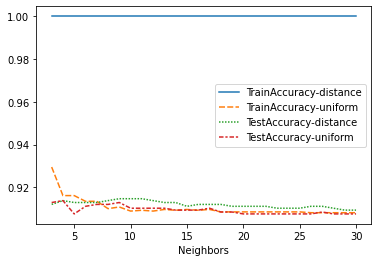

In [53]:
sns.lineplot(data = df_accuracy_weights_pivot)

#### **거리 계산 방법별 이웃 수 증가에 따른 정확도 변화**

In [54]:
train_accuracy = []; test_accuracy = []
para_n_neighbors = [i for i in range(1,11)] * 3
para_metric = (['minkowski']) * 10 + (['euclidean']) * 10 + (['manhattan']) * 10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric) :
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors,
                               metric = v_metric,
                               weights = 'uniform')
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_metric = pd.DataFrame()
df_accuracy_metric['Neighbors'] = para_n_neighbors
df_accuracy_metric['Metric'] = para_metric
df_accuracy_metric['TrainAccuracy'] = train_accuracy
df_accuracy_metric['TestAccuracy'] = test_accuracy

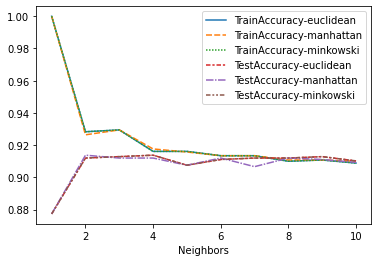

In [55]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = 'Neighbors',
                                                    columns = 'Metric',
                                                    values = ['TrainAccuracy', 'TestAccuracy'])

level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + '-' + level1

sns.lineplot(data = df_accuracy_metric_pivot)

### **결론 도출**

In [56]:
knn_model = KNeighborsClassifier(n_neighbors = 5,
                                 weights = 'uniform',
                                 metric = 'euclidean')
knn_model.fit(df_train_x, df_train_y)
y_pred = knn_model.predict(df_test_x)

print('Train data accuracy : {0:.3f}',format(knn_model.score(df_train_x, df_train_y).round(3)))
print('Test data accuracy : {0:.3f}',format(knn_model.score(df_test_x, df_test_y).round(3)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits = 3))

Train data accuracy : {0:.3f} 0.916
Test data accuracy : {0:.3f} 0.908
Confusion matrix : 
[[1010   11]
 [  93   11]]
              precision    recall  f1-score   support

           0      0.916     0.989     0.951      1021
           1      0.500     0.106     0.175       104

    accuracy                          0.908      1125
   macro avg      0.708     0.547     0.563      1125
weighted avg      0.877     0.908     0.879      1125



- 1 기준 f1 score는 17.1% -> 다른 모델 대비 매우 낮음
- precision은 높으나 recall이 매우 낮음